In [ ]:
import numpy as np
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving idmanual.json to idmanual (1).json


In [ ]:
df = pd.read_json(io.StringIO(uploaded.get('idmanual.json').decode('utf-8')))

In [ ]:
df

,id_tx,class_id,description,status
0,009-4140,009,Bank note acceptors for separating good bank n...,A
1,009-4136,009,Fingerprint imagers,A
2,009-4133,009,Laboratory swabs [laboratory instruments],A
3,009-4131,009,Ear plugs for divers,A
4,009-4130,009,DVD recorders,A
...,...,...,...,...
58697,004-664,004,Cutting fluids for milling,A
58698,004-665,004,Cutting oils for millworking,A
58699,004-666,004,Cutting oils for milling,A
58700,004-667,004,Palm oil being biodiesel fuel,A


In [ ]:
df.head()

,id_tx,class_id,description,status
0,009-4140,009,Bank note acceptors for separating good bank n...,A
1,009-4136,009,Fingerprint imagers,A
2,009-4133,009,Laboratory swabs [laboratory instruments],A
3,009-4131,009,Ear plugs for divers,A
4,009-4130,009,DVD recorders,A


In [ ]:
df.tail()

,id_tx,class_id,description,status
58697,004-664,004,Cutting fluids for milling,A
58698,004-665,004,Cutting oils for millworking,A
58699,004-666,004,Cutting oils for milling,A
58700,004-667,004,Palm oil being biodiesel fuel,A
58701,004-668,004,Palm oil for industrial use,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58702 entries, 0 to 58701
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_tx        58702 non-null  object
 1   class_id     58702 non-null  object
 2   description  58702 non-null  object
 3   status       58702 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [ ]:
df.shape

(58702, 4)

In [ ]:
df.columns

Index(['id_tx', 'class_id', 'description', 'status'], dtype='object')

In [ ]:
df.dtypes

id_tx          object
class_id       object
description    object
status         object
dtype: object

In [ ]:
df.describe()

,id_tx,class_id,description,status
count,58702,58702,58702,58702
unique,58700,49,58602,4
top,016-471,009,Non-metal runners for sliding doors,A
freq,2,5457,2,49477


# DATA CLEANING

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.isnull().sum()

id_tx          0
class_id       0
description    0
status         0
dtype: int64

# TRAIN AND TEST

In [ ]:
target_name='status'
y= df[target_name]
X=df.drop(target_name,axis=1)

In [ ]:
X.head()

,id_tx,class_id,description
0,009-4140,009,Bank note acceptors for separating good bank n...
1,009-4136,009,Fingerprint imagers
2,009-4133,009,Laboratory swabs [laboratory instruments]
3,009-4131,009,Ear plugs for divers
4,009-4130,009,DVD recorders


In [ ]:
y.head()

0    A
1    A
2    A
3    A
4    A
Name: status, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,y_train.shape

((46960, 3), (46960,))

In [ ]:
X_test.shape,y_test.shape

((11741, 3), (11741,))

In [ ]:
df= df.head(10000)

In [ ]:
ratings_utility_matrix = df.pivot_table(values='class_id', index='id_tx', columns='description', fill_value=0)
ratings_utility_matrix.head()

KeyError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
product_descriptions = df.dropna()
product_descriptions.shape
product_descriptions.head()

,description,status
0,Bank note acceptors for separating good bank n...,A
1,Fingerprint imagers,A
2,Laboratory swabs [laboratory instruments],A
3,Ear plugs for divers,A
4,DVD recorders,A


In [ ]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["description"].head(10)

0    Bank note acceptors for separating good bank n...
1                                  Fingerprint imagers
2            Laboratory swabs [laboratory instruments]
3                                 Ear plugs for divers
4                                        DVD recorders
5                     Notebook computer carrying cases
6                  Ergometers not for medical purposes
7    Scientific apparatus and instruments for measu...
8    Scientific apparatus, namely, spectrophotomete...
9                                 Night vision goggles
Name: description, dtype: object

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["description"])
X1

<500x1198 sparse matrix of type '<class 'numpy.float64'>'
	with 2956 stored elements in Compressed Sparse Row format>

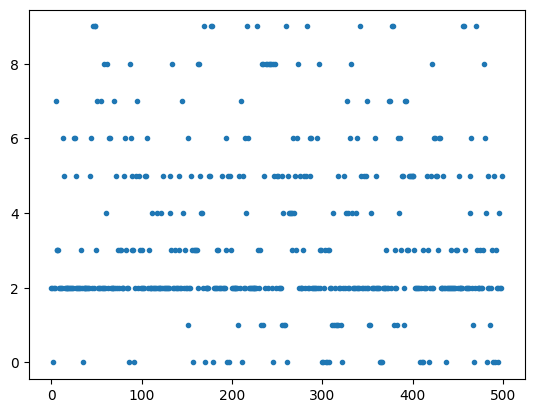

In [ ]:
from sklearn.cluster import KMeans
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [ ]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :4]:
        print(' %s' % terms[ind]),
    print

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to your data
X = vectorizer.fit_transform(df)

# Get the feature names
get_feature = vectorizer.get_feature_names_out()

In [ ]:
from pylab import *
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=58702, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

In [ ]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [ ]:
show_recommendations("Cutting fluids for milling	")